In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate an ARCH(1) process
n = 1000
alpha_0 = 0.1
alpha_1 = 0.8

# Initialize arrays
eps = np.zeros(n)
sigma_sq = np.zeros(n)

# Generate the ARCH process
for t in range(1, n):
    sigma_sq[t] = alpha_0 + alpha_1 * eps[t-1]**2
    eps[t] = np.random.normal(0, np.sqrt(sigma_sq[t]))

# Convert to a Pandas series
arch_series = pd.Series(eps)

In [8]:
# Fit ARIMA(2,1,2) model to the ARCH process
arima_model = ARIMA(arch_series, order=(2, 1, 2))
arima_fit = arima_model.fit()

# Extract and print the summary of the ARIMA model
summary = arima_fit.summary()
print(summary)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -812.841
Date:                Tue, 27 Aug 2024   AIC                           1635.681
Time:                        14:42:47   BIC                           1660.215
Sample:                             0   HQIC                          1645.006
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6657      0.366     -1.819      0.069      -1.383       0.052
ar.L2         -0.0568      0.024     -2.325      0.020      -0.105      -0.009
ma.L1         -0.3542      0.628     -0.564      0.5

c:\Users\p0f3h\anaconda3\envs\2024project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


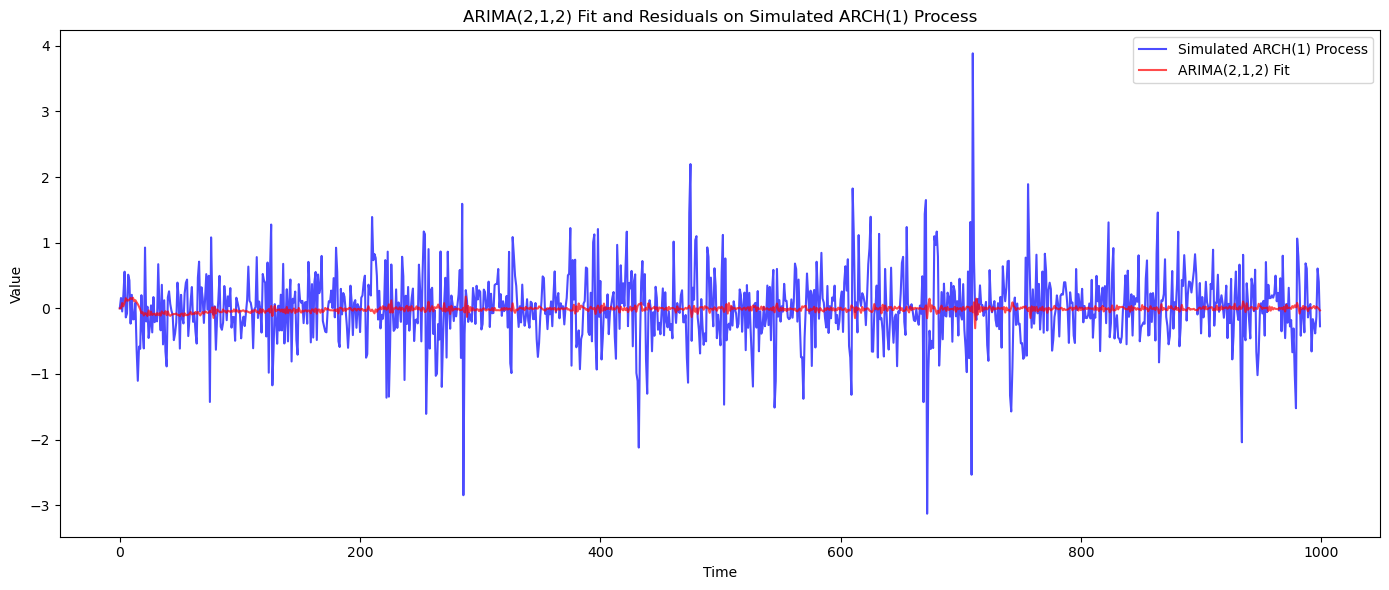

In [10]:
# Get the fitted values and residuals
fitted_values = arima_fit.fittedvalues
residuals = arima_fit.resid

# Plot the simulated ARCH process, ARIMA(2,1,2) fit
plt.figure(figsize=(14, 6))


plt.plot(arch_series, label="Simulated ARCH(1) Process", color='blue', alpha = 0.7)
plt.plot(fitted_values, color='red', label="ARIMA(2,1,2) Fit", alpha = 0.7)


plt.title("ARIMA(2,1,2) Fit and Residuals on Simulated ARCH(1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()
